# CLUSTERING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_excel(r"C:\Users\akhil\Documents\AKHIL\Data Science\Assignments\Clustering\EastWestAirlines.xlsx", sheet_name=1)
df.head()  # Prints the first 5 rows from the top along with the header

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.tail()                #checks the last 5 rows

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
df.shape    #prints the shape of the dataset

(3999, 12)

1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [7]:
df.isnull().sum()          # checking if we have any null values in the dataset

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


### Data Preprocessing:

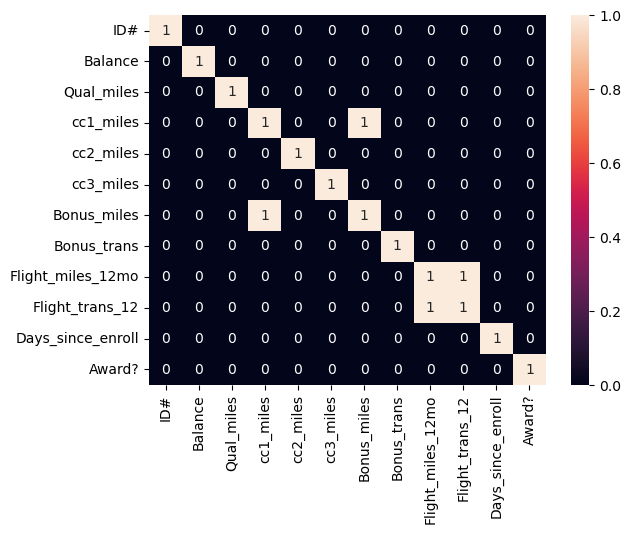

In [11]:
#Let's check for correlation between the columns.
sns.heatmap(df.corr()>0.8, annot=True, cbar=True)
plt.show()

* We are assuming that the columns ["cc1_miles", "Bonus_miles"] and ["Flight_miles_12mo", "Flight_trans_12"] are highly correlated so we'll be removing them.
* We will also be removing ID# column because it doesn't provide any meaningful insights for our model.

In [13]:
df = df.drop(columns=["ID#","Bonus_miles","Flight_trans_12"], axis=1)

In [14]:
df.columns   

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_trans', 'Flight_miles_12mo', 'Days_since_enroll', 'Award?'],
      dtype='object')

Highly correlated columns are removed.

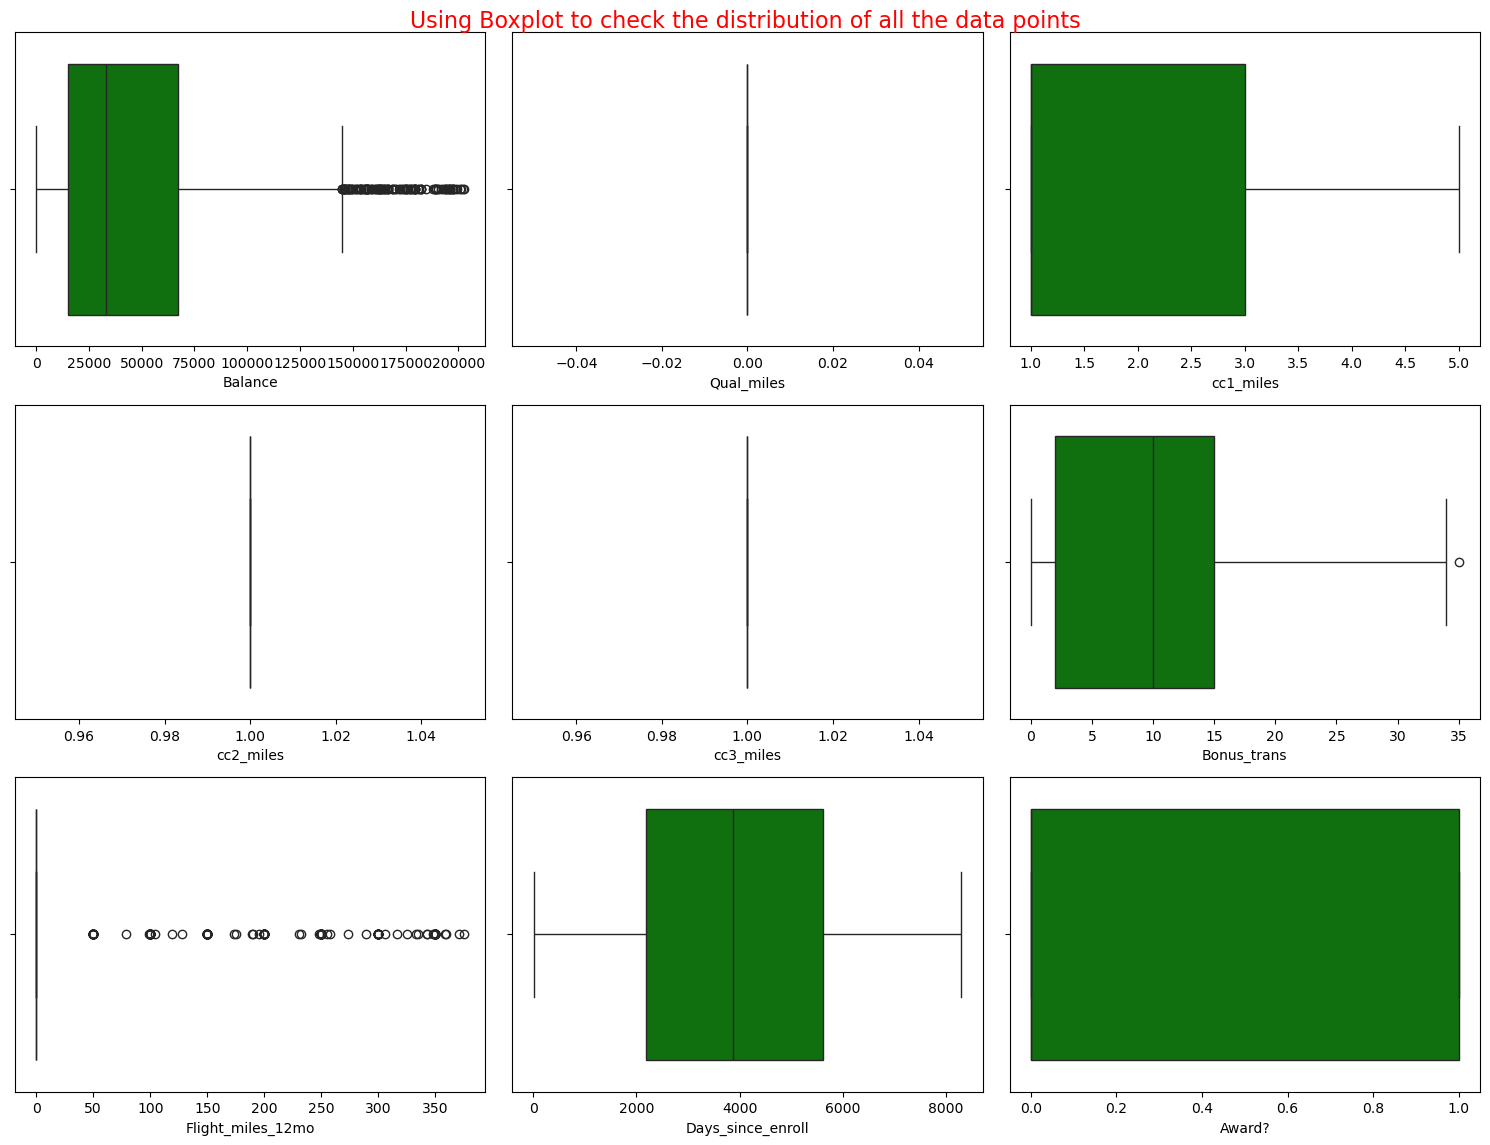

In [102]:
# Let's Check for outliers if any using boxplot
df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(4, 3, index)       #creating subplot
    sns.boxplot(x=df[col], color='green')         # creating box plot inside each subplot
    index += 1                     #increse the index
plt.suptitle("Using Boxplot to check the distribution of all the data points", size=16, color="red")
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

We can observal that almost all the columns have a lot of outliers so we'll be removing them using IQR method.

In [18]:
def remove_outliers(df, column):                                             #function to remove outliers
    Q1 = df[column].quantile(0.25)                                           #defining Q1 
    Q3 = df[column].quantile(0.75)                                           #defining Q3
    IQR = Q3 - Q1                                                            #defining IQR
    lower_bound = Q1 - 1.5 * IQR                                             #calculating lower bound
    upper_bound = Q3 + 1.5 * IQR                                             #calculating upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]     #returning all the rows with greater than lower bound and lesser than upper bound

print("Dataset size before removing outliers: ", df.shape)
for col in df.columns:
    df = remove_outliers(df, col)                                            # calling the function
print("Dataset size after removing outliers: ", df.shape)

Dataset size before removing outliers:  (3999, 9)
Dataset size after removing outliers:  (2763, 9)


A lot of records have be removed because they were all outliers.

In [20]:
#Feature Scaling : Scaling down the features using Standard Scaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.44255777,  0.        , -0.72810632, ..., -0.29097683,
         1.47734549, -0.63333689],
       [-0.64649132,  0.        , -0.72810632, ..., -0.29097683,
         1.46176095, -0.63333689],
       [-0.13980847,  0.        , -0.72810632, ..., -0.29097683,
         1.49390406, -0.63333689],
       ...,
       [ 0.38798043,  0.        , -0.72810632, ..., -0.29097683,
        -1.25238406,  1.5789385 ],
       [ 0.59908682,  0.        ,  0.84727173, ..., -0.29097683,
        -1.24897494,  1.5789385 ],
       [-1.01837957,  0.        , -0.72810632, ..., -0.29097683,
        -1.25092301, -0.63333689]])

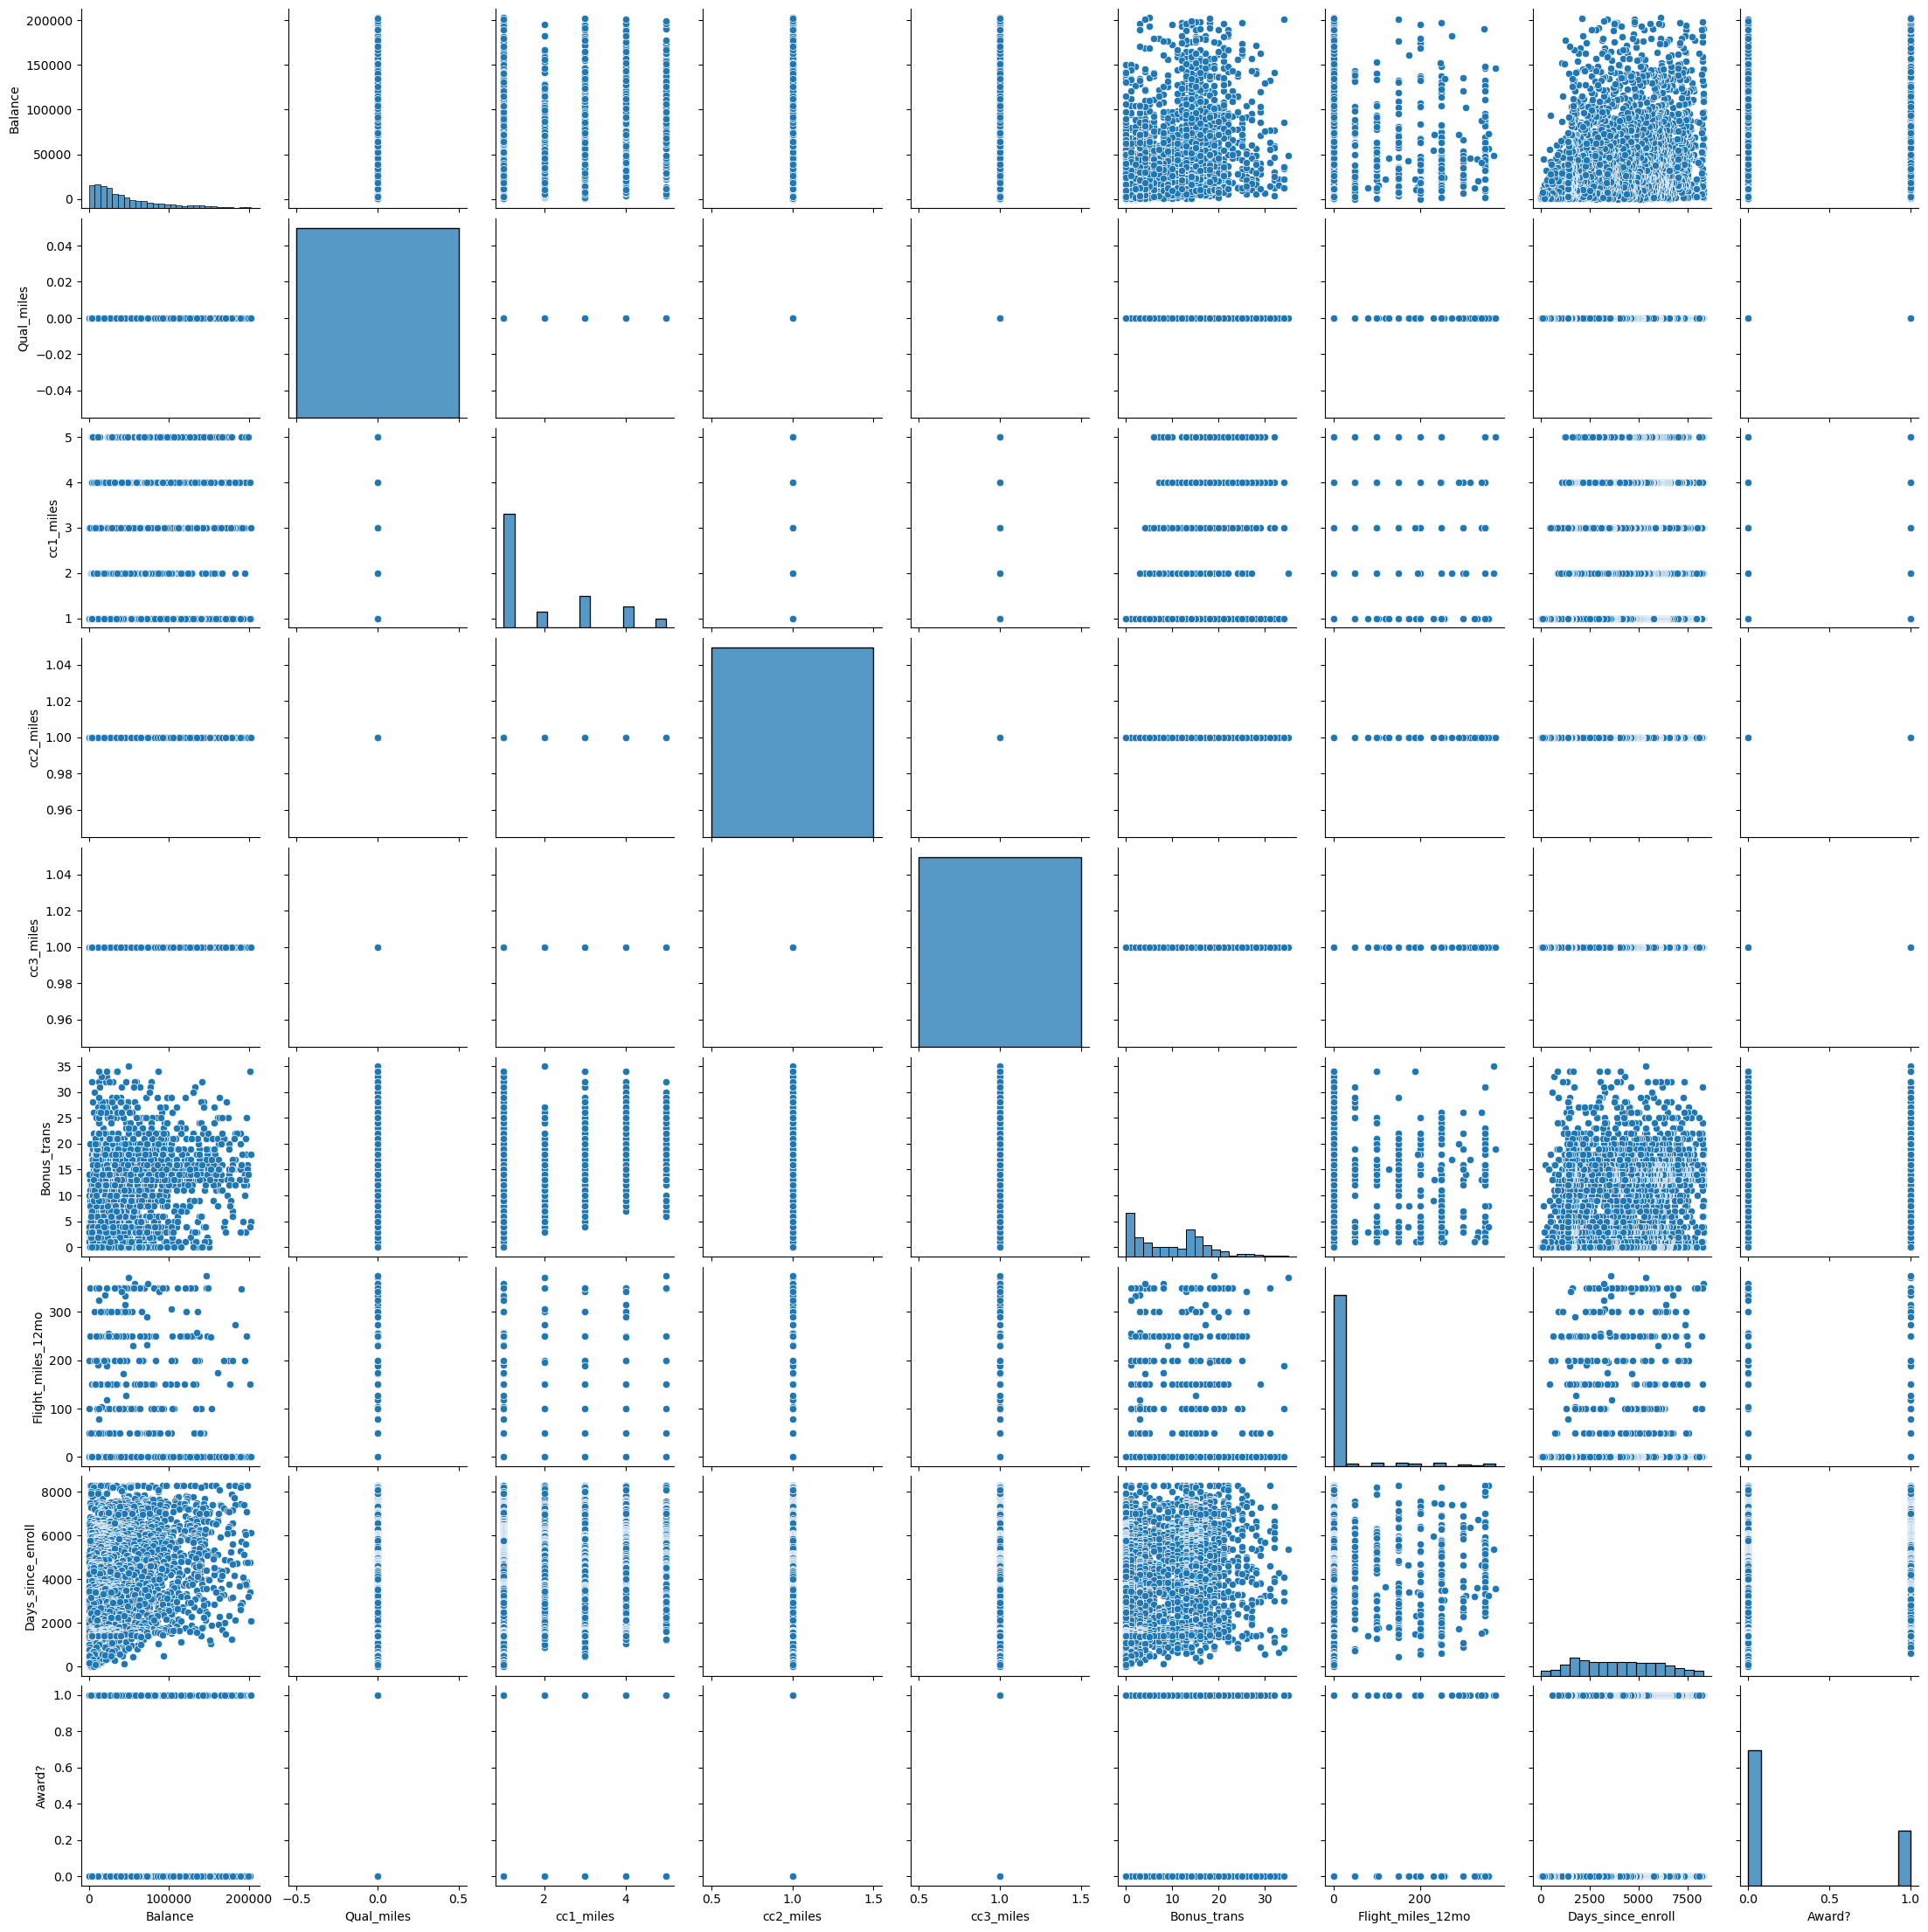

In [21]:
# Pair plots against all the columns
sns.pairplot(df)
plt.show()

Observing all the pairplots we can't be sure of any probable clusters but we do see some kind of linear relationship between many columns.

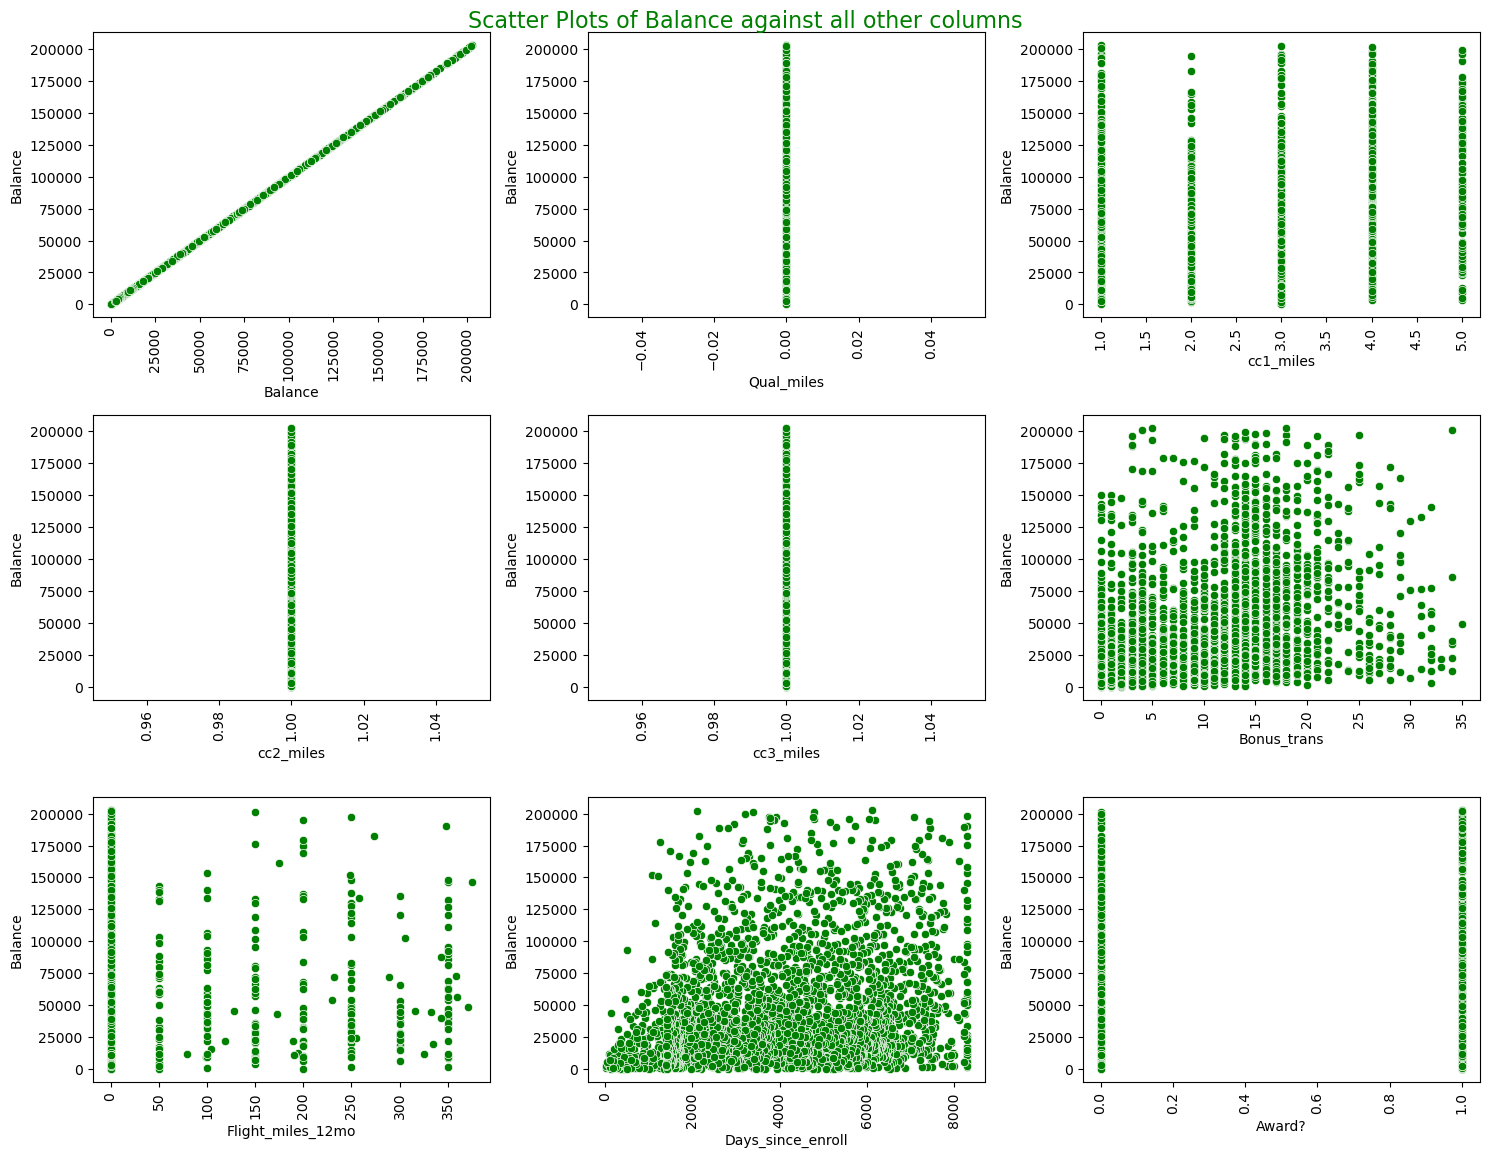

In [23]:
# Let's Check for any potential clusters using Scatterplot Balance against all other columns.

df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(4, 3, index)       #creating subplot
    sns.scatterplot(x=df[col], y=df['Balance'], color = 'green')         # creating scatter plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.xticks(rotation=90)
plt.suptitle("Scatter Plots of Balance against all other columns", fontsize=16, color='green')
plt.tight_layout()                 #used for avoiding overlapping 

plt.show()                         #showing the figure

* Most of the columns show linear or sparse realtionship with no clear distribution of data.
* Balance vs Days_since_enroll shows potential clusters since the data is lying densily towards X axis.
* Similarly Balance vs Bonus_trans also has dense distribution of data towards X axis from 5 to 20.

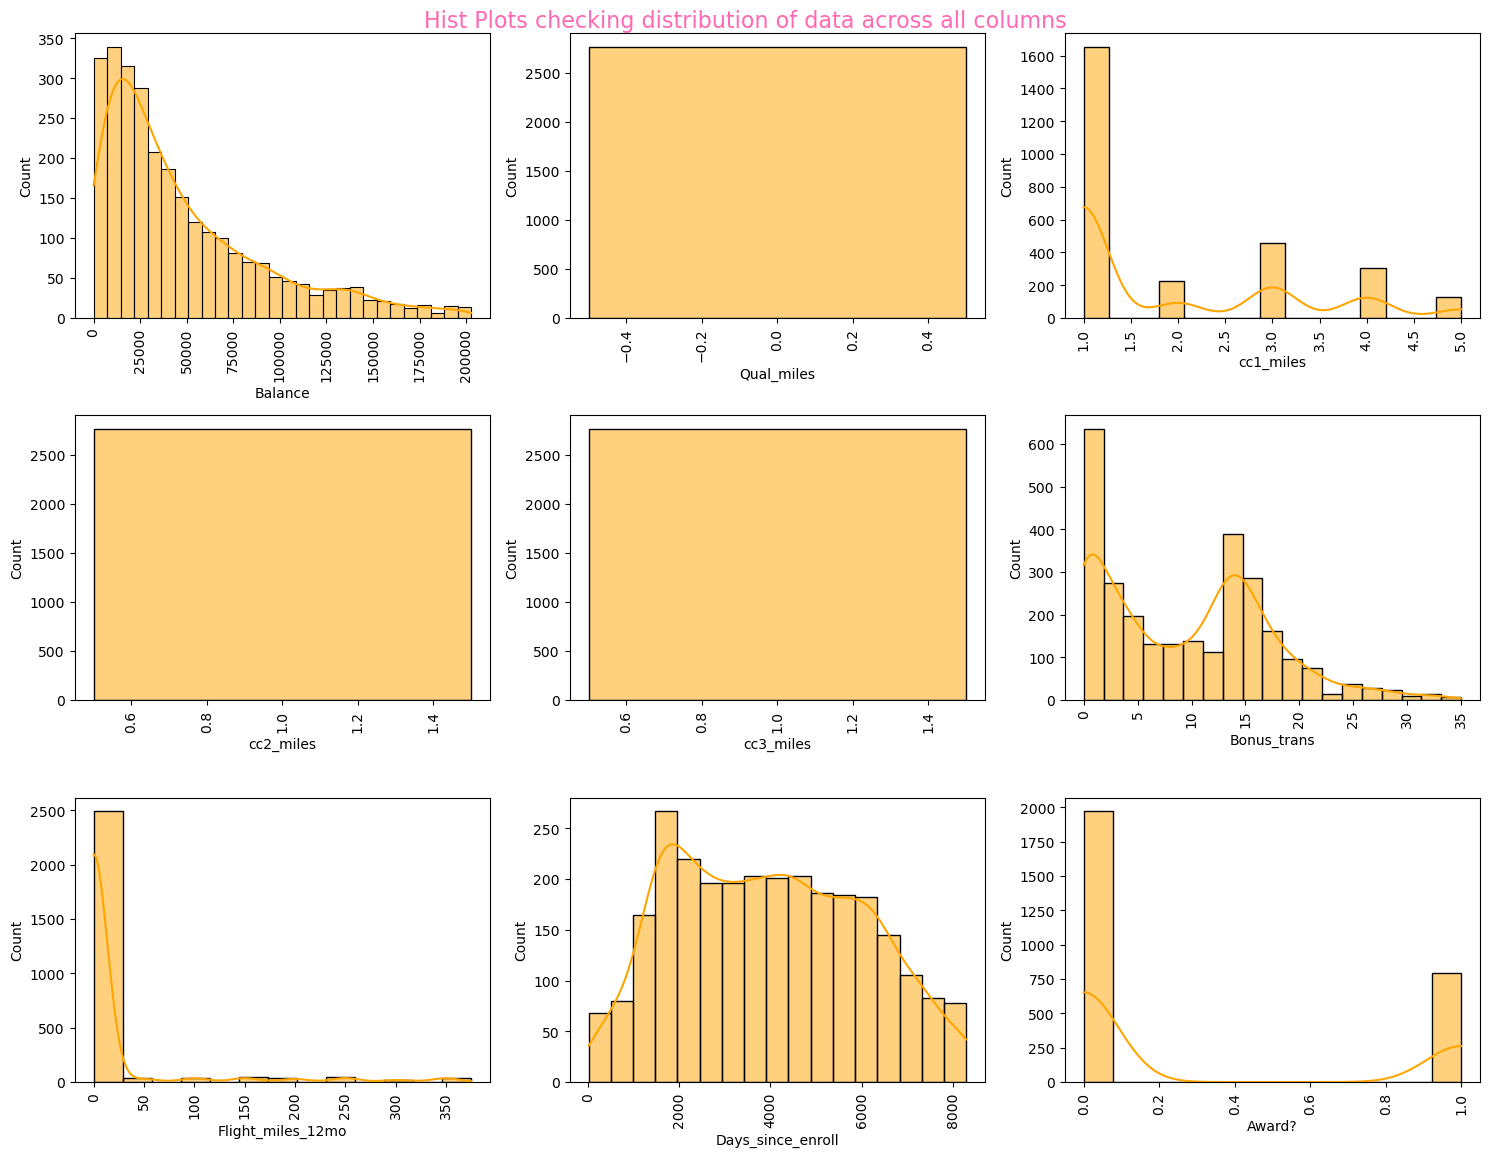

In [104]:
# Let's Check for any potential clusters using Scatterplot Balance against all other columns.

df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(4, 3, index)       #creating subplot
    sns.histplot(x=df[col], kde=True, color='orange')         # creating histplot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.xticks(rotation=90)
plt.suptitle("Hist Plots checking distribution of data across all columns", fontsize=16, color='hotpink')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

We can observe that:
* Many columns like Balance, cc1_miles, Bonus_trans and Days_since_enroll are left skewed
* Few columns do appears to be distributed normally, probably because of the removal of outliers from above

In [27]:
df_cols

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_trans', 'Flight_miles_12mo', 'Days_since_enroll', 'Award?'],
      dtype='object')

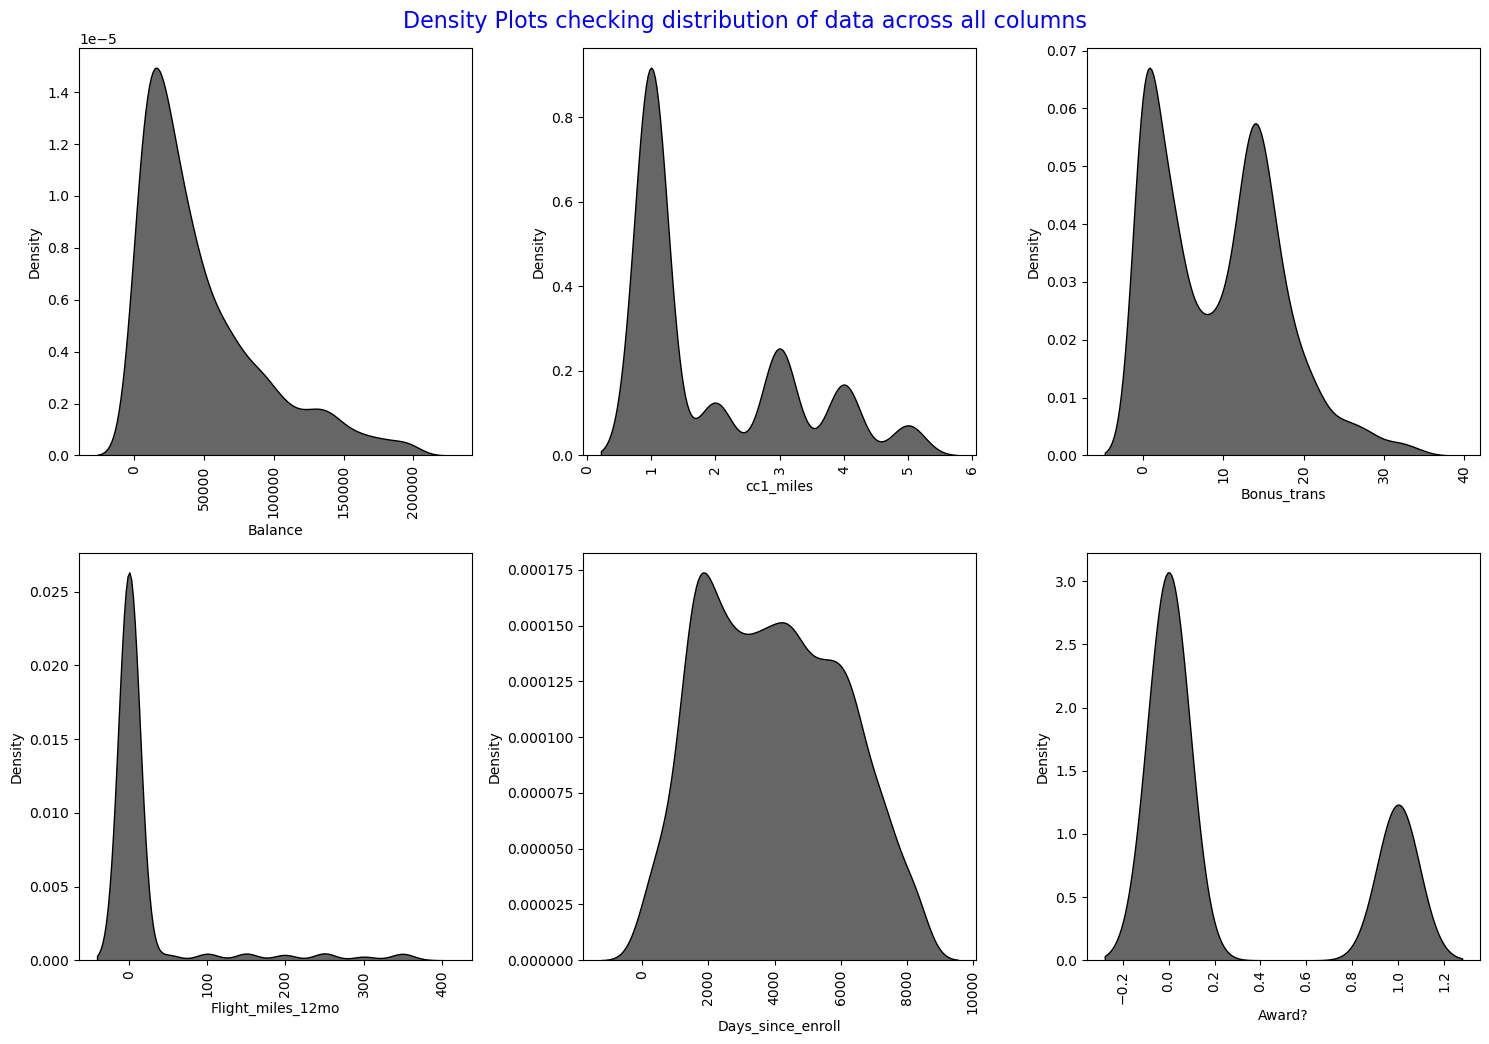

In [106]:
# Let's Check for any potential clusters using Densityplot on all columns.

df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in ['Balance', 'cc1_miles','Bonus_trans', 'Flight_miles_12mo', 'Days_since_enroll', 'Award?']:    #looping through all the columns one by one
    plt.subplot(3, 3, index)       #creating subplot
    sns.kdeplot(data=df, x=col, fill=True, color="black", alpha=0.6)         # creating density plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.xticks(rotation=90)
plt.suptitle("Density Plots checking distribution of data across all columns", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* Here also we can observe many of the columns are left skewed since the distribution is almost left side of the plane which was also revealed above using histplot.
* Three columns [Qual_miles, cc2_miles, cc3_miles] are concentrated to only one value so they show balnk in density plot

### Implementing Clustering Algorithms:

In [31]:
#Feature Extraction
x = df.iloc[:].values
x.shape

(2763, 9)

#### Implementing KMeans algorithm.

In [33]:
# Implementing Elbow Method to find the optimum number of clusters.
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

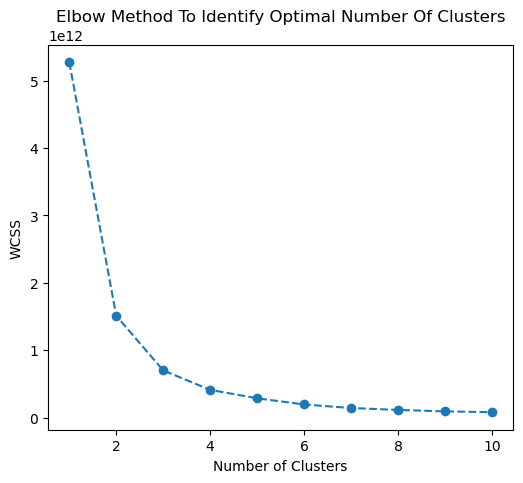

In [34]:
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method To Identify Optimal Number Of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Looking at the lineplot we can say that the most optimum number of clusters for this dataset is 4 since after that the data loss is not exponential.

In [36]:
#Building KMeans Model with the optimum cluser center as 5.

kmeans=KMeans(n_clusters=3, init="k-means++",random_state=42)    # model building
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [37]:
# Identifying cluster centers

centroids = kmeans.cluster_centers_
print("Cluster Centers:\n\n", centroids)

Cluster Centers:

 [[1.92707788e+04 0.00000000e+00 1.43525180e+00 1.00000000e+00
  1.00000000e+00 7.18884892e+00 1.49616307e+01 3.61237050e+03
  2.58393285e-01]
 [6.85175026e+04 0.00000000e+00 2.47526042e+00 1.00000000e+00
  1.00000000e+00 1.23502604e+01 2.46289062e+01 4.30104167e+03
  3.19010417e-01]
 [1.41750709e+05 0.00000000e+00 3.12538226e+00 1.00000000e+00
  1.00000000e+00 1.43241590e+01 2.98990826e+01 4.98752294e+03
  3.51681957e-01]]


In [38]:
# predicting the values
y_kmeans = kmeans.predict(x)
y_kmeans

array([0, 0, 0, ..., 1, 1, 0])

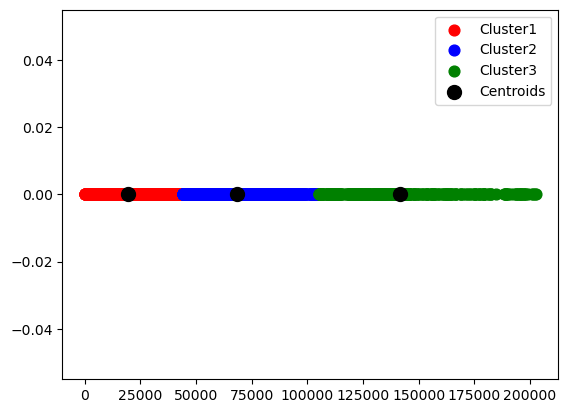

In [39]:
#cluster formation
# sample size
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

In [40]:
#Finding silhouette score for KMeans Algorithm
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
sil_score = silhouette_score(x, labels)
print("Silhouette Score of KMeans Algorithm is : ", sil_score)

Silhouette Score of KMeans Algorithm is :  0.6137293267083511


* Looking at the Silhouette Score of 0.61372 we can say that the model is performing reasonably good.
* Though there might be few overlapping of datapoints.

#### Implementing DBSCAN algorithm.

In [43]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=130, min_samples = 4, metric="euclidean")
db.fit(x)

DBSCAN(eps=130, min_samples=4)

In [44]:
label = db.labels_
label

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [45]:
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True

In [46]:
n_clusters=len(set(label))-(1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


In [47]:
y_means = db.fit_predict(x)
y_means

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

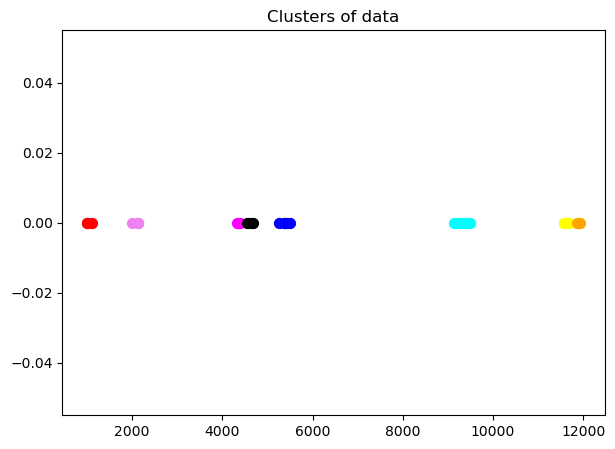

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.title('Clusters of data')
plt.show()

In [49]:
#Finding silhouette score for DBSCAN Algorithm
from sklearn.metrics import silhouette_score

labels_db = db.labels_
sil_score = silhouette_score(x, labels_db)
print("Silhouette Score of DBSCAN Algorithm is : ", sil_score)

Silhouette Score of DBSCAN Algorithm is :  -0.3038353841025521


* We can see our Silhouette Score is quite low so we can say that our model is not able to generalize this dataset that well.
* We can observe the same thing in the graph as well, few of the clusters are overlapping.

#### Implementing Hierarchical Clustering algorithm.

In [52]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

model = AgglomerativeClustering(n_clusters=3, linkage='complete')    #types of linkage are {'ward', 'complete', 'single', 'average'}
model.fit(x)

AgglomerativeClustering(linkage='complete', n_clusters=3)

We have several types of linkage like {'ward', 'complete', 'single', 'average'} aand among those the best performing was "complete"

In [54]:
y_means = model.fit_predict(x)
y_means

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

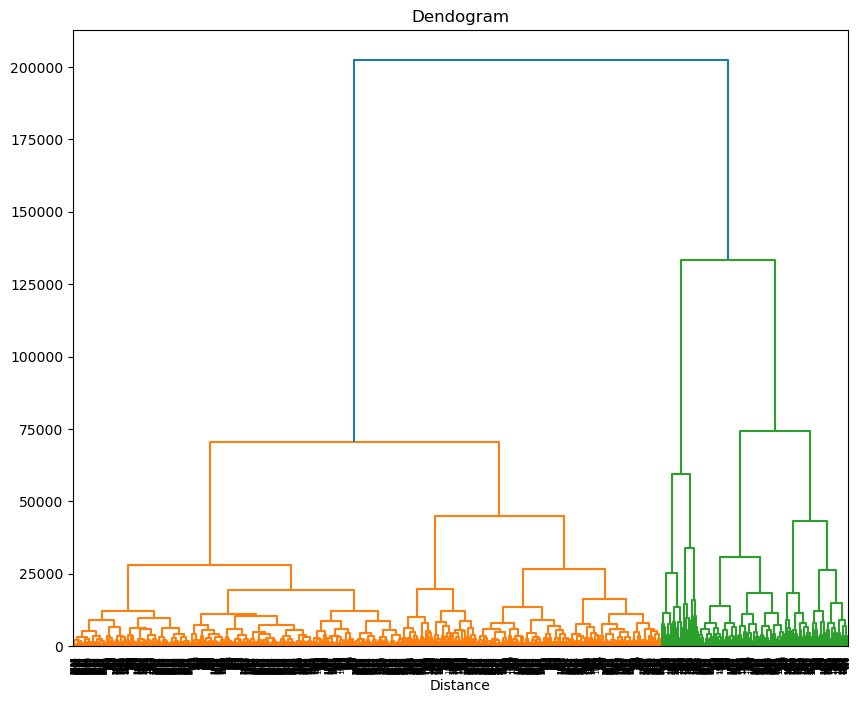

In [55]:
linked = linkage(x, method="complete")
plt.figure(figsize=(10,8))
dendrogram(linked)
plt.title("Dendogram")
plt.xlabel("Data points")
plt.xlabel("Distance")
plt.show()

In [56]:
from scipy.cluster.hierarchy import fcluster

max_distance = 10
clusters = fcluster(linked, max_distance, criterion='distance')
print("The clusters formed are : \n", clusters)

The clusters formed are : 
 [1560  986 1883 ... 1177 2272   60]


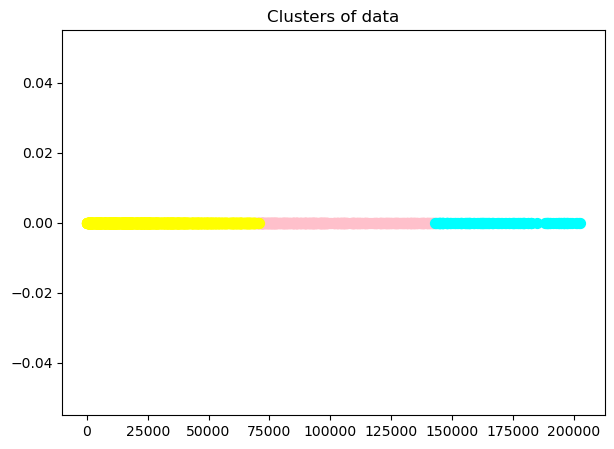

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.title('Clusters of data')
plt.show()

In [58]:
#Finding silhouette score for DBSCAN Algorithm
from sklearn.metrics import silhouette_score

labels_hier = model.labels_
sil_score = silhouette_score(x, labels_hier)
print("Silhouette Score of DBSCAN Algorithm is : ", sil_score)

Silhouette Score of DBSCAN Algorithm is :  0.6255075769916975


#### From above 3 Models the found stats are given as follows

* **KMeans :**
  * Number of clusters recommended by KMeans : 3
  * Silhouette Score of KMeans Algorithm is :  0.6137293267083511

* **DBSCAN :**
  * Number of clusters recommended by DBSCAN : 9
  * Silhouette Score of DBSCAN Algorithm is :  -0.3038353841025521

* **Hierarchical Clustering :**
  * Number of clusters recommended by hierarchical : 3
  * Silhouette Score of hierarchical Algorithm is :  0.6255075769916975

On comparing all the 3 models we can say that:
* DBSCAN is performing tierribly for this dataset.
* Hierarchical and KMeans are performing well comparatively.
* We can conclude that the number of clusters that should be formed is 3.